In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import itertools

In [2]:
os.getcwd()

'/Users/hyebin/Desktop/github/ML_study/1.회귀분석'

In [3]:
ploan = pd.read_csv('./data/Personal Loan.csv')
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# 의미 없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis = 1)

In [5]:
# 상수항 추가
ploan_processed = sm.add_constant(ploan_processed, has_constant = 'add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


# 1. X, y 분리 및 학습데이터 테스트 데이터 분리

In [6]:
feature_columns = ploan_processed.columns.difference(['Personal Loan'])

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
# stratify = y : 학습 데이터와 테스트 데이터에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 2. 로지스틱회귀모형 모델링

In [8]:
model = sm.Logit(train_y, train_x)
results = model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [9]:
results.summary()
# Experience, Mortgage Pvalue 높음 -> 제거 고려

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.6030
Time:                        10:49:29   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [10]:
results.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [11]:
np.exp(results.params) # 나이가 1살 많을수록 대출할 확률이 1.024배 높음

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [12]:
# y_hat 예측
pred_y = results.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [13]:
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return Y.astype(int)

In [14]:
pred_Y = cut_off(pred_y, 0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int64

In [15]:
# confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [16]:
# accuracy 계산
(cfmat[0, 0] + cfmat[1, 1]) / len(pred_Y)

0.9466666666666667

In [17]:
def acc(cfmt):
    acc = (cfmt[0, 0] + cfmt[1, 1]) / (cfmt[0, 0] + cfmt[1, 1] + cfmt[0, 1] + cfmt[1, 0])
    return acc

In [18]:
acc(cfmat)

0.9466666666666667

# 3. 임계값에 따른 성능지표 비교

In [19]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns = ['ACC'])

for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)

table.index.name = 'threshold'
table.columns.name = 'performance'

table # accuracy가 높은 0.5 ~ 0.7 사이의 threshold 설정하는 것이 좋을듯함

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC:  0.9463923891858513


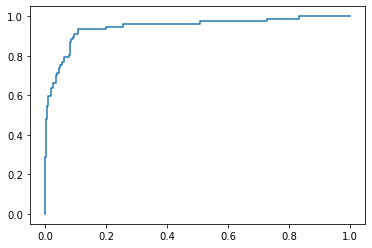

In [20]:
# ROC
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label = 1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

# 4. p-value 높은 2가지의 변수 제거

In [21]:
# Experience, Mortgage 변수 제거

feature_columns = list(ploan_processed.columns.difference(['Personal Loan', 'Experience', 'Mortgage']))

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [22]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(1750, 10) (750, 10) (1750,) (750,)


In [23]:
model = sm.Logit(train_y2, train_x2)
result2 = model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.6030
Time:                        10:50:08   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [25]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.6029
Time:                        10:50:10   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [26]:
pred_y = result2.predict(test_x2)

In [27]:
pred_y2 = cut_off(pred_y, 0.5)

In [28]:
cfmat = confusion_matrix(test_y, pred_y2)
print(acc(cfmat))

0.944


In [29]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns = ['ACC'])

for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)

table.index.name = 'threshold'
table.columns.name = 'performance'
table # threshold 0.6 부근에서 정확도 가장 높음

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC:  0.9465467667547905


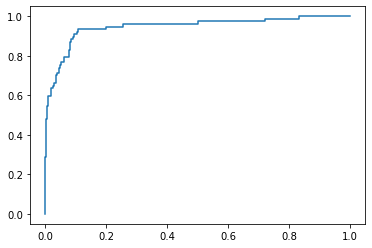

In [30]:
# ROC
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label = 1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

# 5. 변수선택법

In [31]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [32]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [33]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # 모델링
    regression = model.fit() # 모델 학습
    AIC = regression.aic # 모델의 aic
    return {'model': regression, 'AIC': AIC}

print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa23c771700>, 'AIC': 331.1243840786674}


In [34]:
# step 1

def forward(X, y, predictors):
    
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    # 즉 이미 선택된 변수들은 predictors에 들어있음
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X, y, predictors + [p] + ['const']))
    
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 모델 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed ', models.shape[0], 'models on ', len(predictors) + 1, 'predictors in ', toc - tic)
    print('Selected predictors: ', best_model['model'].model.exog_names, 'AIC: ', best_model['AIC'])
    return best_model


# 전진선택법 모델

def forward_model(X, y):
    Fmodels = pd.DataFrame(columns = ['AIC', 'model'])
    tic = time.time()
    
    # 미리 모델에 사용된 변수
    predictors = []
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X = X, y = y, predictors = predictors)
        
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
            
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names # 사용된 변수들을 가져옴
        Fmodel_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    
    return Fmodels['model'][len(Fmodels['model'])]        


# 처음에 모든 변수 넣은 모델 사용 후 점차 필요없는 변수 제거

def backward(X, y, predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results. append(processSubset(X, y, list(combo) + ['const']))
        
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed ', models.shape[0], 'models on ', len(predictors) - 1, 'predictors in ', toc - tic)
    print('Selected predictors: ', best_model['model'].model.exog_names, 'AIC: ', best_model['AIC'])
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns = ['AIC', 'model'], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    
    while len(predictors) > 1:
        Backward_result = backward(train_x, train_y, predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    return Bmodels['model'].dropna().iloc[0]


def Stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns = ['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors + ['const'])['AIC']
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X, y, predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X, y, predictors)
        
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
            
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    return Stepmodels['model'][len(Stepmodels['model'])]

In [35]:
Forward_best_model = forward_model(train_x, train_y)

Processed  11 models on  1 predictors in  0.05075812339782715
Selected predictors:  ['Income', 'const'] AIC:  239.9207874222875
Processed  10 models on  2 predictors in  0.05460929870605469
Selected predictors:  ['Income', 'CD Account', 'const'] AIC:  92.75806832710532
Processed  9 models on  3 predictors in  0.06394290924072266
Selected predictors:  ['Income', 'CD Account', 'Education', 'const'] AIC:  -32.73874624530072
Processed  8 models on  4 predictors in  0.06789493560791016
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'const'] AIC:  -83.87480926714943
Processed  7 models on  5 predictors in  0.03806781768798828
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'const'] AIC:  -96.44896666582645
Processed  6 models on  6 predictors in  0.025096893310546875
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'CreditCard', 'const'] AIC:  -111.09343299897228
Processed  5 models 

In [36]:
Backward_best_model = backward_model(train_x, train_y)

Processed  11 models on  10 predictors in  0.09945392608642578
Selected predictors:  ['Age', 'CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience', 'Family', 'Income', 'Online', 'Securities Account', 'const'] AIC:  -110.71496504103197
Processed  10 models on  9 predictors in  0.08192896842956543
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience', 'Family', 'Income', 'Online', 'Securities Account', 'const'] AIC:  -112.07572514896128
Processed  9 models on  8 predictors in  0.038668155670166016
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Online', 'Securities Account', 'const'] AIC:  -113.29446837263731
Processed  8 models on  7 predictors in  0.03128409385681152
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Securities Account', 'const'] AIC:  -112.47797117459322
Total elapsed time:  0.2880570888519287 seconds


In [37]:
Stepwise_best_model = Stepwise_model(train_x, train_y)

Processed  11 models on  1 predictors in  0.035980939865112305
Selected predictors:  ['Income', 'const'] AIC:  239.9207874222875
forward
Processed  1 models on  0 predictors in  0.014566183090209961
Selected predictors:  ['const'] AIC:  789.479659173553
Processed  10 models on  2 predictors in  0.08063292503356934
Selected predictors:  ['Income', 'CD Account', 'const'] AIC:  92.75806832710532
forward
Processed  2 models on  1 predictors in  0.02024102210998535
Selected predictors:  ['Income', 'const'] AIC:  239.9207874222875
Processed  9 models on  3 predictors in  0.03586387634277344
Selected predictors:  ['Income', 'CD Account', 'Education', 'const'] AIC:  -32.73874624530072
forward
Processed  3 models on  2 predictors in  0.011766672134399414
Selected predictors:  ['Income', 'CD Account', 'const'] AIC:  92.75806832710532
Processed  8 models on  4 predictors in  0.0368959903717041
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'const'] AIC:  -83.87480926714943


In [38]:
pred_y_full = results.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [39]:
pred_Y_full = cut_off(pred_y_full, 0.5) 
pred_Y_forward = cut_off(pred_y_forward, 0.5) 
pred_Y_backward = cut_off(pred_y_backward, 0.5) 
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5) 

In [40]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [41]:
print(len(results.model.exog_names))
print(len(Forward_best_model.model.exog_names))
print(len(Backward_best_model.model.exog_names))
print(len(Stepwise_best_model.model.exog_names))

12
9
9
9


In [42]:
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))

0.9466666666666667
0.932
0.932
0.932


AUC:  0.9463923891858513


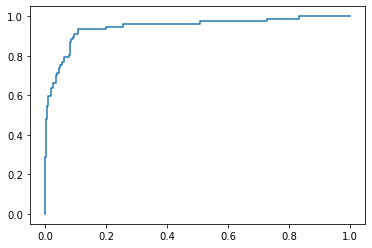

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_full, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

AUC:  0.9498079928986319


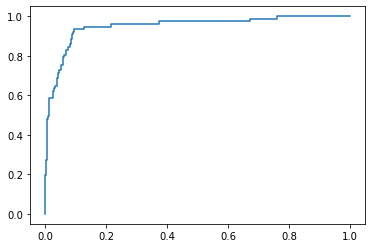

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_forward, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

AUC:  0.9498079928986319


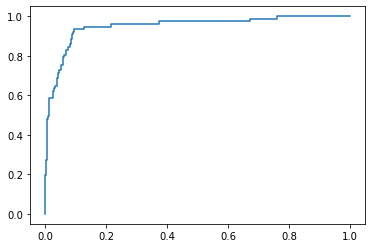

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_backward, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

AUC:  0.9498079928986319


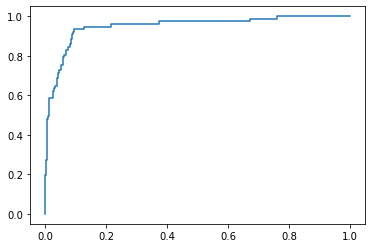

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_stepwise, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

# 6. Lasso & Ridge & ElasticNet

In [48]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [49]:
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis = 1)

feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 11) (750, 11) (1750,) (750,)


## 6-1. lasso

In [55]:
# lasso 적합
ll = Lasso(alpha = 0.01) # 람다 값 지정
ll.fit(train_x, train_y)

Lasso(alpha=0.01)

In [56]:
# 회귀 계수 출력

ll.coef_ 
# 4개의 변수(Age, CreditCard, Online, Securities Account)의 계수가 0이 됨
# 중요한 변수만 뽑아내주는 것이 아님!! 

array([ 0.00000000e+00,  2.04783983e-03,  1.14390390e-01, -0.00000000e+00,
        6.58342418e-02,  4.76625359e-04,  3.13396711e-02,  3.55393865e-03,
        1.31719530e-05,  0.00000000e+00, -0.00000000e+00])

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 May 2021   Pseudo R-squ.:                  0.6030
Time:                        10:59:45   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [58]:
pred_y_lasso = ll.predict(test_x)
pred_Y_lasso = cut_off(pred_y_lasso, 0.5)
cfmat = confusion_matrix(test_y, pred_Y_lasso)
print(acc(cfmat))
# 이전보다 성능이 감소함

0.936


AUC:  0.9439995368672931


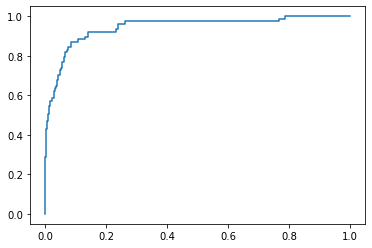

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_lasso, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

## 6-2. ridge

In [60]:
# ridge 적합
rr = Ridge(alpha = 0.01)
rr.fit(train_x, train_y)

Ridge(alpha=0.01)

In [61]:
rr.coef_ # ridge는 계수가 0에 가까워지지만 0이 되지는 않음

array([-3.71283678e-03,  7.37570775e-03,  3.54973975e-01, -5.28579506e-02,
        7.83404224e-02,  4.12823466e-03,  3.62504712e-02,  3.27385112e-03,
        1.73105480e-06, -1.91297381e-02, -8.77388670e-02])

In [62]:
pred_y_ridge = rr.predict(test_x)
pred_Y_ridge = cut_off(pred_y_ridge, 0.5)
cfmat = confusion_matrix(test_y, pred_Y_ridge)
print(acc(cfmat))
# lasso보다 성능이 떨어짐

0.932


AUC:  0.9494992377607533


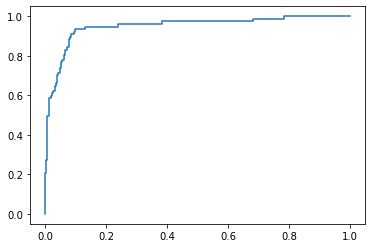

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_ridge, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)
# auc는 lasso보다 높음

## 6-3. lambda 값의 변화에 따른 accuracy 측정

In [66]:
# lambda 값에 따른 회귀 계수 / accuracy 계산
alpha = np.logspace(-3, 1, 5)
alpha # 0.001 ~ 10 범위로 설정

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [74]:
data = []
acc_table = []

for _, a in enumerate(alpha):
    lasso = Lasso(alpha = a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    pred_y = lasso.predict(test_x)
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append(acc(cfmat))
    
cf_lasso = pd.DataFrame(data, index = alpha).T
acc_tabel_lasso = pd.DataFrame(acc_table, index = alpha).T

In [75]:
cf_lasso

,0.001,0.010,0.100,1.000,10.000
0,-0.335006,-0.381869,-0.143698,-0.113103,0.102286
1,-0.002109,0.000000,0.000000,0.000000,-0.000000
2,0.006829,0.002048,0.000000,0.000000,0.000000
3,0.322174,0.114390,0.000000,0.000000,0.000000
4,-0.043385,-0.000000,-0.000000,-0.000000,-0.000000
5,0.076771,0.065834,0.000000,0.000000,0.000000
6,0.002534,0.000477,0.000000,0.000000,-0.000000
7,0.035728,0.031340,0.000000,0.000000,0.000000
8,0.003313,0.003554,0.003291,0.002893,0.000000
9,0.000004,0.000013,0.000016,0.000000,0.000000


In [76]:
acc_tabel_lasso

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.936,0.894667,0.897333,0.897333


In [77]:
data = []
acc_table = []

for _, a in enumerate(alpha):
    ridge = Ridge(alpha = a).fit(train_x, train_y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    pred_y = ridge.predict(test_x)
    pred_y = cut_off(pred_y, 0.5)
    cfmat = confusion_matrix(test_y, pred_y)
    acc_table.append(acc(cfmat))
    
cf_ridge = pd.DataFrame(data, index = alpha).T
acc_tabel_ridge = pd.DataFrame(acc_table, index = alpha).T

In [78]:
cf_ridge

,0.001,0.010,0.100,1.000,10.000
0,-0.289557,-0.289565,-0.289645,-0.290438,-0.297581
1,-0.003713,-0.003713,-0.003713,-0.003716,-0.003723
2,0.007376,0.007376,0.007376,0.007378,0.007388
3,0.355019,0.354974,0.354529,0.350141,0.311781
4,-0.052866,-0.052858,-0.052782,-0.052037,-0.045541
5,0.078340,0.078340,0.078341,0.078347,0.078316
6,0.004128,0.004128,0.004129,0.004136,0.004175
7,0.036250,0.036250,0.036254,0.036289,0.036578
8,0.003274,0.003274,0.003274,0.003278,0.003313
9,0.000002,0.000002,0.000002,0.000002,0.000004


In [79]:
acc_tabel_ridge

,0.001,0.010,0.100,1.000,10.000
0,0.932,0.932,0.932,0.932,0.932


## 6-4. lambda 값의 변호에 따른 회귀계수 축소 시각화

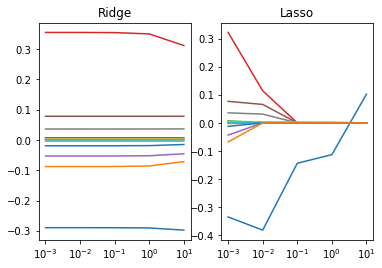

In [83]:
ax1 = plt.subplot(121)
plt.semilogx(cf_ridge.T)
plt.xticks(alpha)
plt.title('Ridge')

ax2 = plt.subplot(122)
plt.semilogx(cf_lasso.T)
plt.xticks(alpha)
plt.title('Lasso')

plt.show()